FEATURE SELECTION Techniques

In [ ]:
import pandas as pd

In [18]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
df.duplicated().sum()

0

Univariate Selection

In [21]:
X=df.drop(['price_range'],axis=1)

In [22]:
Y=df['price_range']

Univariate Analysis

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
#Apply SelectKBest Algo
#By default K=10
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
order=ordered_rank_features.fit(X,Y)

In [31]:
df1=pd.DataFrame(order.scores_,columns=['Score'])
dfc=pd.DataFrame(X.columns)
features_rank = pd.concat([dfc,df1],axis=1)

In [34]:
features_rank.sort_values('Score')

,0,Score
17,three_g,0.327643
19,wifi,0.422091
3,dual_sim,0.631011
2,clock_speed,0.648366
1,blue,0.723232
7,m_dep,0.745820
5,four_g,1.521572
18,touch_screen,1.928429
9,n_cores,9.097556
10,pc,9.186054


In [36]:
#higher the value of the score higher is the particular feature
features_rank.nlargest(10,'Score')

,0,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [ ]:
#smaller the values,better they can be dropped

Technique 2:
**Feature Importance** : this technique gives a score for each feature of your data.higher the score more relevant it is

In [39]:
 from sklearn.ensemble import ExtraTreesClassifier
 import matplotlib.pyplot as plt
 model=ExtraTreesClassifier()
 model.fit(X,Y)

ExtraTreesClassifier()

In [40]:
print(model.feature_importances_)

[0.05980933 0.01973173 0.03383272 0.0209669  0.0329047  0.01746291
 0.03463124 0.03343684 0.0376039  0.03290875 0.03389818 0.04648688
 0.04847722 0.39086545 0.03357591 0.03381592 0.03563298 0.0139591
 0.01962567 0.02037366]


In [41]:
rank=pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

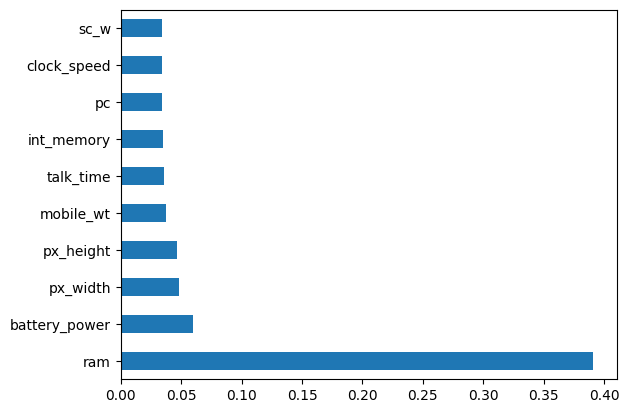

In [42]:
rank.nlargest(10).plot(kind='barh')

#Ram has highest and followed by battery power

Tecjnique 3: **Pearson Correlation**

<Axes: >

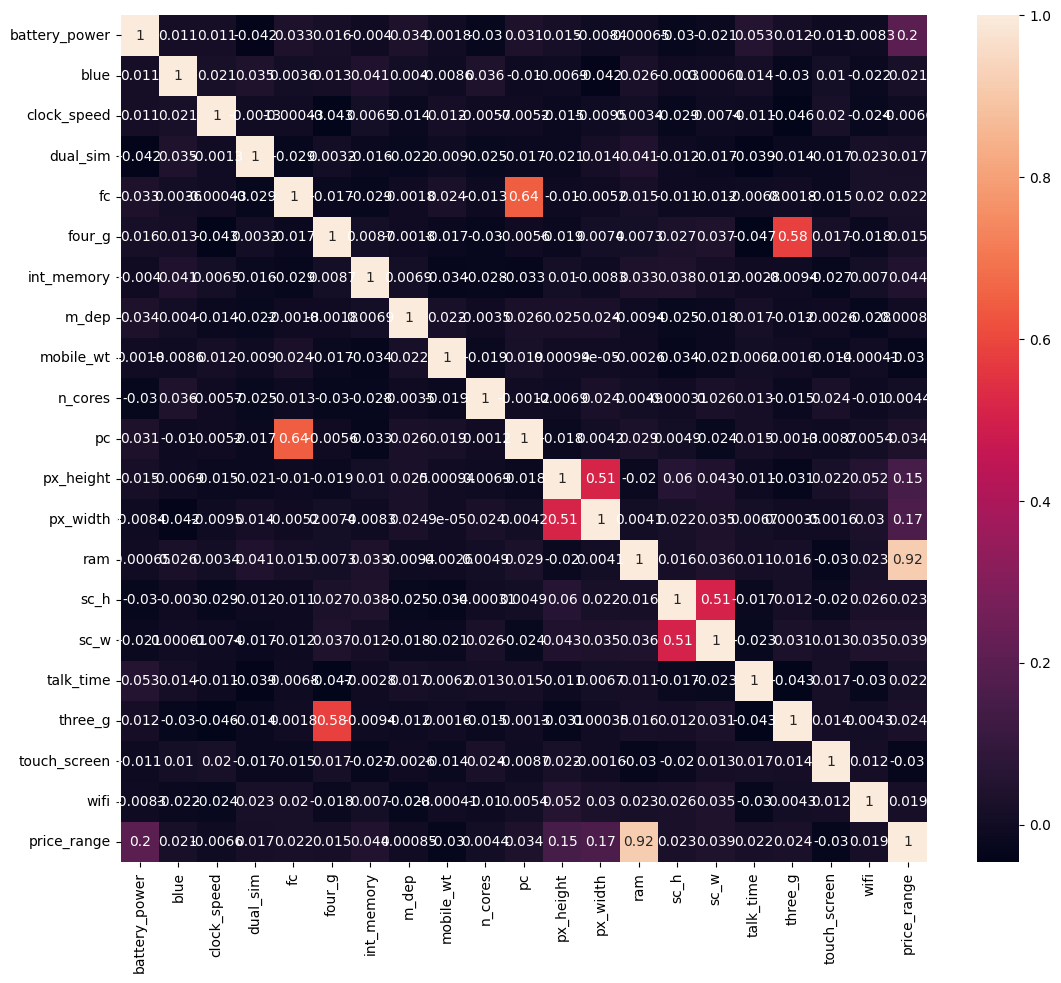

In [49]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(13,11))
sns.heatmap(corr,annot=True)

In [50]:
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

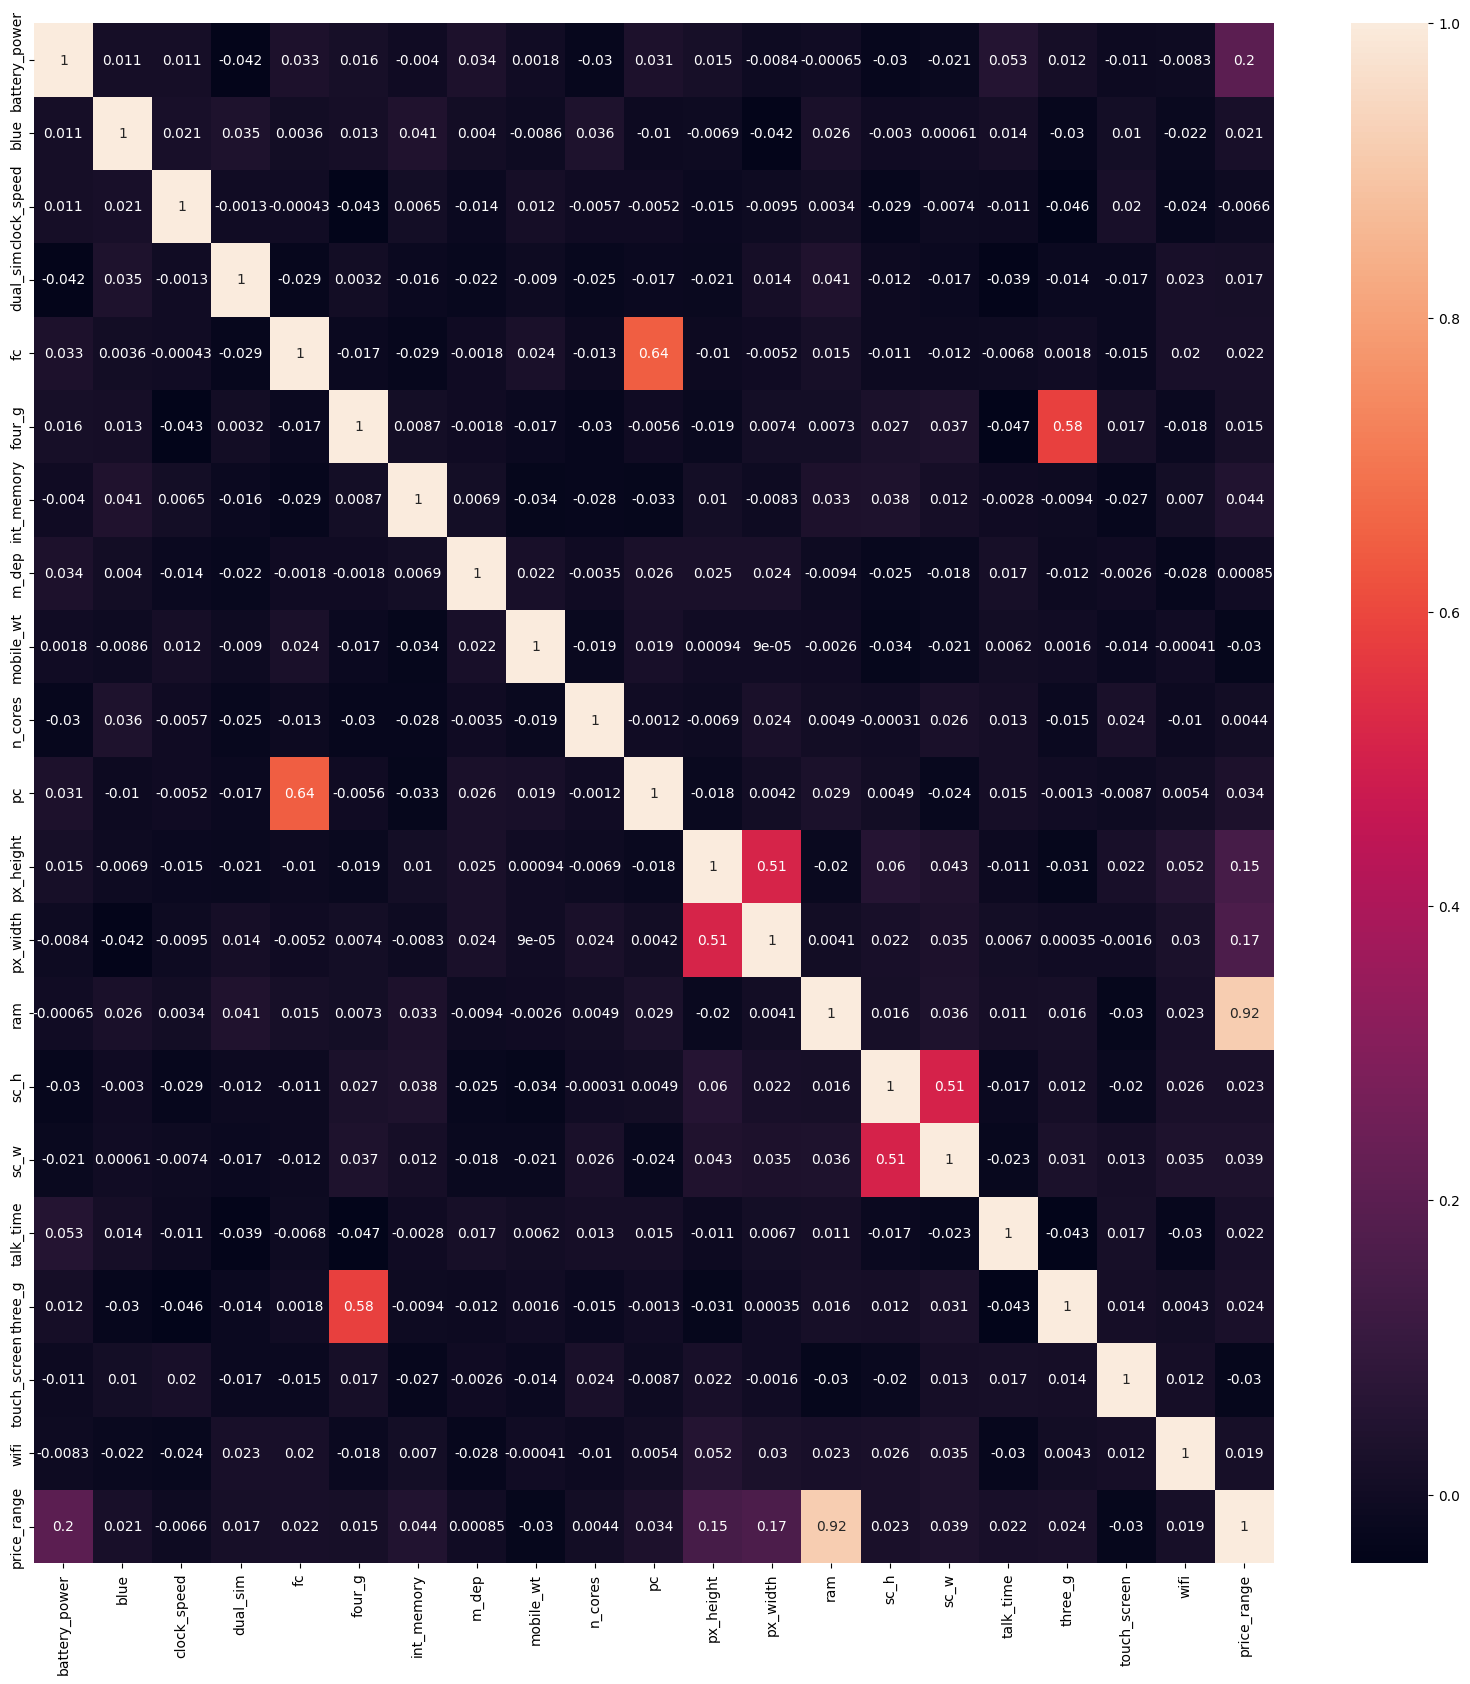

In [52]:
top = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top].corr(),annot=True)

In [56]:
#if 2 features are high correlated like more than 0.85, we can drop 1 of the feature
threshold=0.5
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [57]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

Technique 4: **Information Gian** Mutual_underscore_classification

In [58]:
from sklearn.feature_selection import mutual_info_classif

In [62]:
mut=mutual_info_classif(X,Y)

In [67]:
md=pd.Series(mut)
md

0     0.028468
1     0.010792
2     0.001151
3     0.009307
4     0.010404
5     0.000000
6     0.008390
7     0.000000
8     0.002433
9     0.000000
10    0.005063
11    0.025754
12    0.027680
13    0.848834
14    0.000000
15    0.040639
16    0.003399
17    0.000000
18    0.008352
19    0.003574
dtype: float64

In [65]:
md=pd.Series(mut,index=X.columns)
md.sort_values(ascending=False)

ram              0.848834
sc_w             0.040639
battery_power    0.028468
px_width         0.027680
px_height        0.025754
blue             0.010792
fc               0.010404
dual_sim         0.009307
int_memory       0.008390
touch_screen     0.008352
pc               0.005063
wifi             0.003574
talk_time        0.003399
mobile_wt        0.002433
clock_speed      0.001151
n_cores          0.000000
m_dep            0.000000
sc_h             0.000000
four_g           0.000000
three_g          0.000000
dtype: float64

So we drop the features having 0 value and retain top values